Refrence: https://www.mygreatlearning.com/blog/face-recognition/


This is a very simple project on Human Facial Recoginition using OpenCV, dlib and face_recoginition libraries.

In [1]:
cd /content/drive/MyDrive/projects/face recoginition/

/content/drive/MyDrive/projects/face recoginition


In [2]:
ls

6.jpg  7.jpg  face_enc  Images/


dlib is a python API to use facial recoginition module/model which is actaully a trained RESNET model on 3 million faces with accuracy of 99.38%. 

In [4]:
pip install dlib

In [3]:
pip install face_recognition

     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=4d5faf926f7ca86a89d5f6387f5c39d65f961398bb4e88446a353c79dc1a06fe
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [5]:
pip install imutils

**import all packages**

In [6]:
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

**Create Embeddings**

1: create a folder named "Images" and keep images of every person in seprate folder

2:pass folder and script will generate embedding of all images in dataset


In [7]:
#path to image folder in google drive .the folder contain many sub-folder having images of same person   
imagePaths = list(paths.list_images('Images'))
#any empty list where individual embeddings will append.
knownEncodings = [] 
knownNames = []
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract person names from path
    name = imagePath.split(os.path.sep)[-2]
    # load the input image and convert it from BGR (OpenCV ordering)
    # to dlib ordering (RGB)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #Use Face_recognition to locate faces
    boxes = face_recognition.face_locations(rgb,model='hog')
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
    # loop over the encodings
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)
#save encodings along with their names in dictionary data
data = {"encodings": knownEncodings, "names": knownNames}
#use pickle to save data into a file for later use
#this fle is located at the path which will use later to work on test image
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

**Testing on Images**

1: Pass an unknown image to recognize person in the images.
 

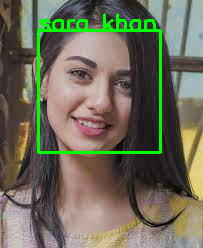

In [8]:
from google.colab.patches import cv2_imshow
 
#find path of xml file containing haarcascade file
cascPathface = os.path.dirname(
 cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
# load the harcaascade in the cascade classifier
faceCascade = cv2.CascadeClassifier(cascPathface)
# load the known faces and embeddings saved in last file
data = pickle.loads(open('face_enc', "rb").read())
#Find path to the image you want to detect face and pass it here

image = cv2.imread("/content/drive/MyDrive/projects/face recoginition/7.jpg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#convert image to Greyscale for haarcascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(60, 60),
                                     flags=cv2.CASCADE_SCALE_IMAGE)
 
# the facial embeddings for face in input
encodings = face_recognition.face_encodings(rgb)
names = []
# loop over the facial embeddings incase
# we have multiple embeddings for multiple fcaes
for encoding in encodings:
    #Compare encodings with encodings in data["encodings"]
    #Matches contain array with boolean values and True for the embeddings it matches closely
    #and False for rest
    matches = face_recognition.compare_faces(data["encodings"],
    encoding)
    #set name =inknown if no encoding matches
    name = "Unknown"
    # check to see if we have found a match
    if True in matches:
        #Find positions at which we get True and store them
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}
        # loop over the matched indexes and maintain a count for
        # each recognized face face
        for i in matchedIdxs:
            #Check the names at respective indexes we stored in matchedIdxs
            name = data["names"][i]
            #increase count for the name we got
            counts[name] = counts.get(name, 0) + 1
            #set name which has highest count
            name = max(counts, key=counts.get)
 
 
        # update the list of names
        names.append(name)
        # loop over the recognized faces
        for ((x, y, w, h), name) in zip(faces, names):
            # rescale the face coordinates
            # draw the predicted face name on the image
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
             0.75, (0, 255, 0), 2)
    cv2_imshow(image)
    cv2.waitKey(0)